In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [3]:
numeric_df=df.drop('species',axis=1)
corr_m = numeric_df.corr()
corr_m.round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.12,0.87,0.82
sepal width (cm),-0.12,1.00,-0.43,-0.37
petal length (cm),0.87,-0.43,1.00,0.96
petal width (cm),0.82,-0.37,0.96,1.00


Text(0.5, 0.98, 'Heatmap')

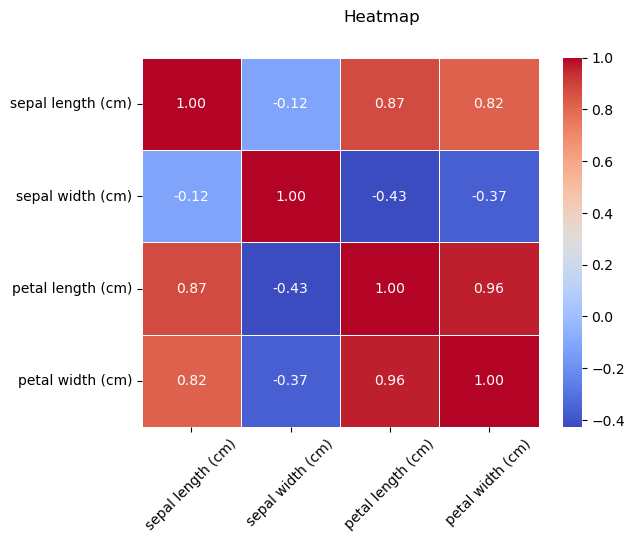

In [7]:
sns.heatmap(corr_m,annot=True,linewidths=0.5, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=45)
plt.suptitle('Heatmap')

In [8]:
strong_pairs = corr_m.unstack().sort_values(ascending=False)
strong_pairs = strong_pairs[(abs(strong_pairs)>0.7) & (abs(strong_pairs) <1.0)]

In [10]:
seen = set()
for (f1,f2),val in strong_pairs.items():
    if(f2,f1) not in seen:
        print(f"{f1} - {f2} : {val:.3f}")
        seen.add((f1,f2))

petal length (cm) - petal width (cm) : 0.963
sepal length (cm) - petal length (cm) : 0.872
sepal length (cm) - petal width (cm) : 0.818
